In [6]:
import os
import random
import requests
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


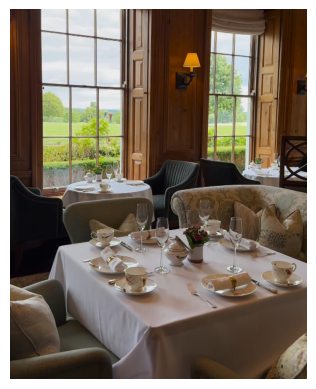

Detecciones para la imagen 7.png:
Clase: wine glass, Confianza: 0.84
Coordenadas: {'top_left': [255, 372], 'bottom_right': [286, 474]}
Clase: wine glass, Confianza: 0.84
Coordenadas: {'top_left': [387, 371], 'bottom_right': [418, 471]}
Clase: chair, Confianza: 0.79
Coordenadas: {'top_left': [0, 296], 'bottom_right': [101, 478]}
Clase: cup, Confianza: 0.76
Coordenadas: {'top_left': [203, 459], 'bottom_right': [246, 504]}
Clase: wine glass, Confianza: 0.74
Coordenadas: {'top_left': [221, 341], 'bottom_right': [251, 436]}
Clase: chair, Confianza: 0.69
Coordenadas: {'top_left': [94, 335], 'bottom_right': [253, 418]}
Clase: dining table, Confianza: 0.68
Coordenadas: {'top_left': [83, 377], 'bottom_right': [527, 631]}
Clase: chair, Confianza: 0.66
Coordenadas: {'top_left': [236, 269], 'bottom_right': [340, 385]}
Clase: chair, Confianza: 0.65
Coordenadas: {'top_left': [286, 312], 'bottom_right': [530, 450]}
Clase: couch, Confianza: 0.63
Coordenadas: {'top_left': [286, 312], 'bottom_right': [5

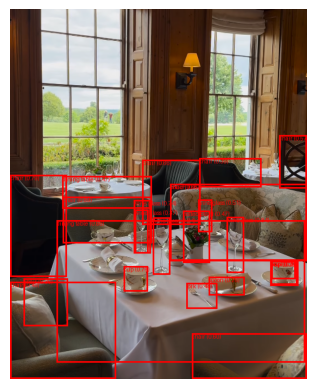

In [22]:
# Directorio que contiene las imágenes de prueba
image_dir = 'test_images'
    
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

# Elegir una imagen al azar del directorio
random_image = random.choice(image_files)
image_path = os.path.join(image_dir, random_image)

# Mostrar la imagen seleccionada
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Desactivar los ejes para una mejor visualización
plt.show()

# URL de la API FastAPI (asegúrate de que la API esté ejecutándose)
api_url = "http://localhost:8001/detect/"

# Enviar la imagen a la API
with open(image_path, 'rb') as img_file:
    response = requests.post(api_url, files={'file': img_file})

# Verificar la respuesta
if response.status_code == 200:
    detections = response.json().get('detections', [])
    print(f"Detecciones para la imagen {random_image}:")
    
    # Dibujar los cuadros delimitadores sobre la imagen original
    draw = ImageDraw.Draw(img)
    
    for detection in detections:
        class_name = detection['class']
        confidence = detection['confidence']
        coordinates = detection['coordinates']
        
        top_left = tuple(coordinates['top_left'])
        bottom_right = tuple(coordinates['bottom_right'])
        
        draw.rectangle([top_left, bottom_right], outline="red", width=3)
        draw.text(top_left, f"{class_name} ({confidence:.2f})", fill="red")
        
        # Imprimir la información de la detección
        print(f"Clase: {class_name}, Confianza: {confidence:.2f}")
        print(f"Coordenadas: {coordinates}")
    
    # Mostrar la imagen con los cuadros delimitadores
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print(f"Error al enviar la imagen: {response.status_code}")
